# <center> Hypotheses testing </center>

In [3]:
import numpy as np
import pandas as pd
from scipy import stats # https://docs.scipy.org/doc/scipy/reference/stats.html
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('students_grades.csv')
data.head()

,group,student,a1_coursera,a2_coursera,b_coursera,coursera,d1a,d1b,d1c,d1d,...,k1b,k1c,k1d,k1e,k1f,k1f.1,k1prel,k1,total,final
0,БЭК181,eds_python_2020_1,50.0,50.0,40.0,10.0,1.0,1.0,1.0,1.0,...,10.0,20.0,30.0,4.0,22.0,5.0,101.0,10.1,4.520000,5.0
1,БЭК181,eds_python_2020_2,50.0,50.0,40.0,10.0,1.0,1.0,1.0,1.0,...,10.0,20.0,NaN,16.0,12.0,NaN,67.0,6.7,3.840000,4.0
2,БЭК181,eds_python_2020_3,50.0,50.0,40.0,10.0,1.0,1.0,1.0,1.0,...,10.0,20.0,NaN,20.0,30.0,NaN,82.0,8.2,4.140000,4.0
3,БЭК181,eds_python_2020_4,50.0,50.0,40.0,10.0,1.0,1.0,1.0,1.0,...,10.0,20.0,NaN,16.0,14.0,NaN,70.0,7.0,3.900000,4.0
4,БЭК181,eds_python_2020_5,50.0,50.0,40.0,10.0,0.0,1.0,1.0,0.0,...,10.0,12.0,0.0,16.0,22.0,NaN,70.0,7.0,3.566667,4.0


In [5]:
data.dropna(subset=["k1"], inplace=True)

<img src="http://work.thaslwanter.at/Stats/html/_images/DistributionFunctions.png" width=500>

* **Probability density function (PDF)**: note that to obtain the probability for the variable appearing in a certain interval, you have to integrate the PDF over that range.

Example: What is the chance that a man is between 165 and 170 cm tall?

* **Cumulative distribution function (CDF)**: gives the probability of obtaining a value smaller than the given value.

Example: What is the chance that a man is less than 165 cm tall?

* **Percentile point function (PPF, inverse of cdf))**: the inverse of the CDF. Answers the question “Given a certain probability, what is the corresponding value for the CDF?”

Example: Given that I am looking for a man who is smaller than 95% of all other men, what size does the subject have to be?

In [6]:
norm_rv = stats.norm()
# quantiles for two-sided tails at a significance level of 0.05
alpha = 0.05
round(norm_rv.ppf(alpha/2), 2), round(norm_rv.ppf(1 - alpha/2), 2)

(-1.96, 1.96)

The method ```norm_rv.ppf()``` takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at.

It is equivalent to a, 'One-tail test' on the density plot. This will return a value (that functions as a 'standard-deviation multiplier') marking where 95% of data points would be contained if our data is a normal distribution.

In [7]:
x = data.k1.values

mean_hat = x.mean()
std_hat = x.std()
mean_hat, std_hat

(5.431282051282051, 3.1658426832055393)

In [8]:
min(x), max(x)

(0.0, 13.0)

__a)__ Plot a histogram for the grades of the first control work (```k1``` variable).

In [9]:
data.student.nunique() # data.shape[0]

390

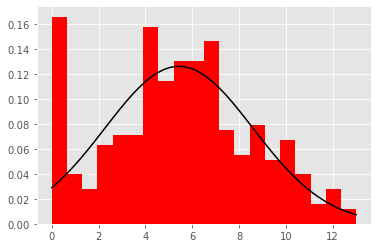

In [11]:
# histogram using matplotlib.pyplot

xs = np.linspace(0, 13)
ys = stats.norm(mean_hat, std_hat).pdf(xs)
plt.plot(xs, ys, color="black")
data.k1.hist(bins=20, density=True, color='r');

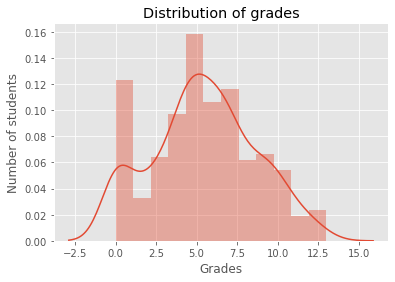

In [13]:
# histogram using seaborn
sns.distplot(data['k1']);
plt.title('Distribution of grades')
plt.xlabel('Grades')
plt.ylabel('Number of students');

Let's assume the incredible - the independence and the same distribution of our observations!

__b)__ Plot an approximate $95\%$ -th confidence interval for the expected result of k1 (the first control work).

$$
\left[\bar x - z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} ; \bar x + z_{crit} \sqrt{\frac{\hat\sigma^2}{n}} \right]
$$

In [14]:
x.var() == x.std() ** 2

True

In [15]:
alpha = 0.05 # probability of rejecting a true null hypothesis (type 1 error)
x = data.k1.values
mean_hat = x.mean()
var_hat = x.var()
n = x.size

In [18]:
# The exact confidence interval
# We assume that the sample is normal and small => z_crit is taken from the Student's distribution

#  n-1 is used is because that is the number of degrees of freedom in the sample
t_crit = stats.t(n-1).ppf(1 - alpha/2)
left = mean_hat - t_crit * np.sqrt(var_hat/n)
right = mean_hat + t_crit * np.sqrt(var_hat/n)

print("Student's quantile:", round(stats.t(n - 1).ppf(0.975), 4))
print("Confidence interval [{:.4}; {:.4}] of width {:.3}".format(left, right, right - left))
# {:.4} - number's precision till the third digit afther the floating point

Student's quantile: 1.9661
Confidence interval [5.116; 5.746] of width 0.63


For the case where the original distribution is not normal, the central limit theorem can be used.

In [19]:
# Asymptotic Confidence Interval
# t(n) => N(0,1) given n -> infinity

z_crit = stats.norm.ppf(1 - alpha/2)
left = mean_hat - z_crit * np.sqrt(var_hat/n)
right = mean_hat + z_crit * np.sqrt(var_hat/n)

print('Quantile for the standard normal distribution', round(stats.norm().ppf(0.975), 4))
print("Confidence interval [{:.4}; {:.4}] of width {:.3}".format(left, right, right - left))

Quantile for the standard normal distribution 1.96
Confidence interval [5.117; 5.745] of width 0.628


Fast alternative:

In [20]:
# Built-in way to plot asymptotic 95% confidence interval
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/n)
stats.norm.interval(0.95, mu_hat, sd_hat)

(5.117082820375691, 5.745481282188411)

We'll use the function below to plot a graph to look at our confidence interval. It's not required to understand the code in this function. 

In [21]:
def norm_conf_int(alpha, mean_hat, std_hat, margin=1):
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = stats.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)

    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
            text_margin = -0.2
        else:
            xq = np.linspace(right, mean_hat + margin)
            text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right

(5.117082820375691, 5.745481282188411)

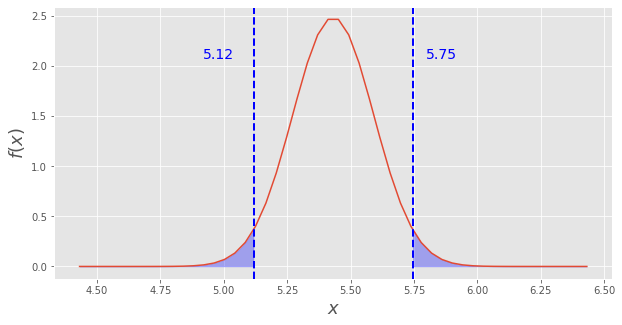

In [22]:
alpha = 0.05
mu_hat = x.mean()
sd_hat = np.sqrt(x.var()/n)

norm_conf_int(alpha, mu_hat, sd_hat)

A 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population. This is not the same as a range that contains 95% of the values.

Let's divide our observations into two groups: Angels and Demons. Angels have `d1fraud == 0`, Demons have` d1fraud > 0`.

__c)__ Plot a histogram of grades for the first control work for Angels and Demons. 

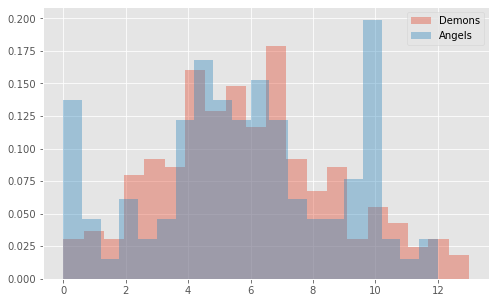

In [52]:
plt.figure(figsize=(8, 5))
data[data.d1fraud > 0]['k1'].hist(alpha=0.4, bins=20, density=True, label="Demons") # alpha is for the transperancy
data[data.d1fraud == 0]['k1'].hist(alpha=0.4, bins=20, density=True, label="Angels")
plt.legend();

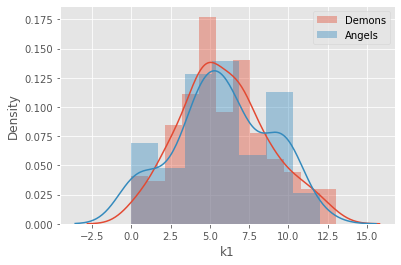

In [53]:
# seaborn
sns.distplot(data[data.d1fraud > 0]['k1'], label='Demons')
sns.distplot(data[data.d1fraud == 0]['k1'], label='Angels')
plt.legend()
plt.show()

__d)__ Plot the approximate $95\% $ confidence interval for the difference between the expected result for the first control work for Angels and Demons. The assumption is the variances are not equall.

$$
\left[\bar x - \bar y - z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} ; \bar x - \bar y + z_{crit} \sqrt{\frac{\hat\sigma_x^2}{n_x} + \frac{\hat\sigma_y^2}{n_y}} \right]
$$

In [25]:
x = data[data.d1fraud > 0].k1
y = data[data.d1fraud == 0].k1

round(x.mean(), 2), round(y.mean(), 2)

(5.9, 5.76)

(-0.5328339053849281, 0.8087678503390611)

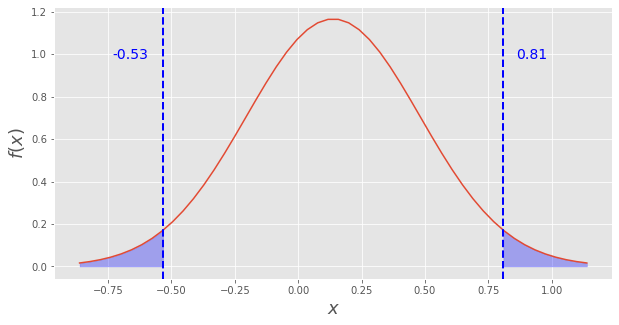

In [26]:
alpha = 0.05

diff = x.mean() - y.mean()
diff_sd = np.sqrt(x.var()/x.size + y.var()/y.size)

# asymptotic interval for the difference between the means of two independent samples
norm_conf_int(alpha, diff, diff_sd)

### Hypothesis testing
<ol>
<li>What’s the default statement (H0)?</li>
<li>What’s the alternative statement (H1)?</li>
<li>What have we learned that’s interesting? Sample statistic vs population</li>
</ol>

#### Hypothesis formulation
H0: there is no statistically significant difference in the average grades for control work 1 (k1) between Angels and Demons. <p>
H1: there is a significant difference in the average grades between Angels and Demons.
    
If **$H_0$ is rejected**, then there is a difference between the two groups.

In [57]:
# H_0 : mean_angels = mean_demons is the same thing as  mean_angels - mean_demons  = 0. 
# H_A : mean_angels != mean_demons

z_obs = diff/diff_sd
z_obs # observed value of Z for this sample

0.40311559813836634

In [56]:
alpha = 0.05 
z_crit = stats.norm.ppf(1 - alpha/2)
z_crit  # critical value 
# if -z_crit < z_obs <  z_crit => hypothesis is not rejected

1.959963984540054

0.4 is in [-1.96, 1.96] -> we do not reject the $H_0$ hypothesis. Hence, the average grades among Demones and Angels are not different with a confidence of $95\%$.

Let us assume that the mathematical expectation of the grade depends on the level of preparation, and the variance of the result depends on the degree of nervousness. 

__е)__ Check the hypothesis about the same nervousness of Angels and Demons at the $5\%$ significance level.

The difference between the **t-test** (Student's test) and **F-test** is that t-test is used to check the hypothesis whether the given mean is significantly different from the sample mean or not. On the other hand, an F-test is used to compare the two standard deviations of two samples and check the variability.

#### Hypothesis formulation
H0: there is no difference in the variance (the degree of nervousness) between Angels and Demons. <p>
H1: there is a significant difference in the variance (the degree of nervousness) between Angels and Demons.
    
If **$H_0$ is rejected**, then there is a difference between the two groups.

In [27]:
F_obs = x.var()/y.var()
n, m = x.size, y.size
F_obs

0.8546097465268332

In [28]:
alpha = 0.05
round(stats.f.ppf(alpha/2, n - 1, m - 1), 2), round(stats.f.ppf(1 - alpha/2, n - 1, m - 1), 2)
# The hypothesis about equal variances is not rejected

(0.73, 1.39)

0.8 is in (0.73, 1.39) => $H_0$ is not rejected, there is no significant difference in the degree of nervousness between Angels and Demons. 

__f)__ Draw a correlation matrix for all the tasks of the first checklist for all observations, separately for Angels and Demons.

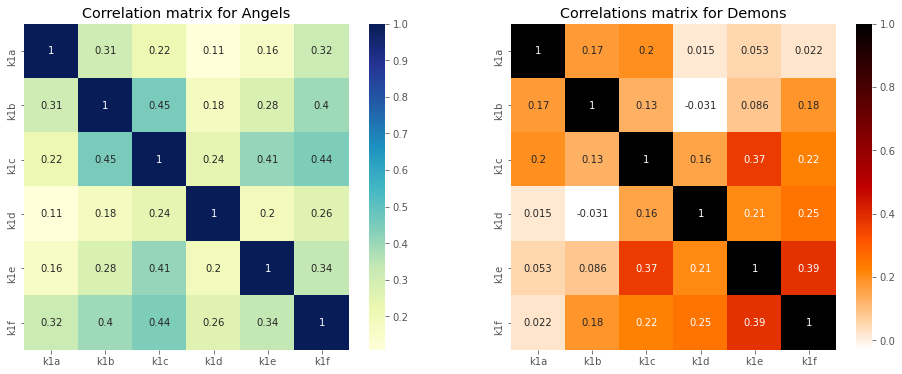

In [62]:
tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

corr_angels = data[data.d1fraud == 0][tasks].fillna(0).corr()
corr_demons = data[data.d1fraud > 0][tasks].fillna(0).corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(corr_angels, cmap="YlGnBu", annot=True, ax=axes[0])
sns.heatmap(corr_demons , cmap="gist_heat_r", annot=True, ax=axes[1])
axes[0].set_title("Correlation matrix for Angels")
axes[1].set_title("Correlations matrix for Demons");

Making a statistical decision always involves uncertainties, so the risks of making these errors are unavoidable in hypothesis testing.

<img src='errors.png' width=500>

The probability of making a Type I error is the significance level, or alpha ($\alpha$), while the probability of making a Type II error is beta ($\beta$). These risks can be minimized through careful planning in your study design.

* **Type I error**, also known as a “false positive”: the error of rejecting a null
hypothesis when it is actually true. In other words, this is the error of accepting an
alternative hypothesis (the real hypothesis of interest) when the results can be
attributed to chance.
<br>
* **Type II error**, also known as a "false negative": the error of not rejecting a null
hypothesis when the alternative hypothesis is the true state of nature. In other
words, this is the error of failing to accept an alternative hypothesis when you
don't have adequate power.

Example: Type I vs Type II error

You decide to get tested for COVID-19 based on mild symptoms. There are two errors that could potentially occur: <br>
1) Type I error (false positive): the test result says you have coronavirus, but you actually don’t. <br>
2) Type II error (false negative): the test result says you don’t have coronavirus, but you actually do. <br>

You can aim to minimize the risk of these errors by selecting an optimal significance level and ensuring high power. However, there’s a trade-off between the two errors, so a fine balance is necessary.

## Strongly recommended to recap:

1) [A step-by-step guide to statistical analysis](https://www.scribbr.com/category/statistics/)

2) [An introduction to t-tests](https://www.scribbr.com/statistics/t-test/)

3) [The p-value explained](https://www.scribbr.com/statistics/p-value/)

4) [Distributions of one variable](http://work.thaslwanter.at/Stats/html/statsDistributions.html)

5) https://medium.com/@RenatoFillinich/ab-testing-with-python-e5964dd66143

## Example of A/B test

Let’s imagine you work on the product team at a medium-sized online e-commerce business. The UX designer worked really hard on a new version of the product page, with the hope that it will lead to a higher conversion rate. The product manager (PM) told you that the current conversion rate is about $13\%$ on average throughout the year, and that the team would be happy with an increase of $2\%$, meaning that the new design will be considered a success if it raises the conversion rate to $15\%$.

First things first, we want to make sure we formulate a hypothesis at the start of our project. This will make sure our interpretation of the results is correct as well as rigorous.
Given we don’t know if the new design will perform better or worse (or the same?) as our current design, we’ll choose a two-tailed test.

$H_0$: $p = p_0$, where p and pₒ stand for the conversion rate of the new and old design.
    
The $\alpha$ value is a threshold we set, by which we say “if the probability of observing a result as 
extreme or more (p-value) is lower than $\alpha$, then we reject the Null hypothesis”. Since our $\alpha$=0.05 
(indicating $5\%$ probability), our confidence ($1 — \alpha$) is $95\%$. 

We want to be $95\%$ confident it is statistically different from the conversion rate of our old design, before we decide to reject the Null hypothesis Hₒ.

For our test we’ll need two groups:

**A control group** - They'll be shown the old design

**A treatment (or experimental) group** - They'll be shown the new design

This will be our **independent variable**. The reason we have two groups even though we know the baseline conversion rate is that we want to control for other variables that could have an effect on our results, such as seasonality: by having a control group we can directly compare their results to the treatment group, because the only systematic difference between the groups is the design of the product page, and we can therefore attribute any differences in results to the designs.

For our **dependent variable** (i.e. what we are trying to measure), we are interested in capturing the conversion rate. A way we can code this is by each user session with a binary variable:

* $0$ - The user did not buy the product during this user session

* $1$ - The user bought the product during this user session

**Choosing a sample size.**

The number of people (or user sessions) we decide to capture in each group will have an effect on the precision of our estimated conversion rates: the larger the sample size, the more precise our estimates (i.e. the smaller our confidence intervals), the higher the chance to detect a difference in the two groups.On the other hand, the larger our sample gets, the more expensive (and impractical) our study becomes.

So how many people should we have in each group?

The sample size we need is estimated through something called Power analysis, and it depends on a few factors:

* Power of the test ($1 — \beta$) — This represents the probability of finding a statistical difference between the groups in our test when a difference is actually present. This is usually set at $0.8$ by convention (here’s more info on statistical power, if you are curious).

* Alpha value ($\alpha$) — The critical value we set earlier to $0.05$.

* Effect size — How big of a difference we expect there to be between the conversion rates.

Since our team would be happy with a difference of $2\%$, we can use $13\%$ and $15\%$ to calculate the effect size we expect.

In [76]:
import scipy.stats as stats
import statsmodels.stats.api as sms
from math import ceil

effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates

# Calculating sample size needed
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )

required_n = ceil(required_n) # Rounding up to next whole number                          
print(required_n)

4720


In [66]:
df = pd.read_csv('ab_data.csv') # https://www.kaggle.com/zhangluyuan/ab-testing?select=ab_data.csv
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


* user_id - The user ID of each session <br>
* timestamp - Timestamp for the session <br>
* group - Which group the user was assigned to for that session {control, treatment} <br>
* landing_page - Which design each user saw on that session {old_page, new_page} <br>
* converted - Whether the session ended in a conversion or not (binary, 0=not converted, 1=converted) <br>

In [67]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


Before we go ahead and sample the data to get our subset, let’s make sure there are no users that have been sampled multiple times.

In [68]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()
print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 3894 users that appear multiple times in the dataset


Since the number is pretty low, we’ll go ahead and remove them from the DataFrame to avoid sampling the same users twice.

In [69]:
users_to_drop = session_counts[session_counts > 1].index

df = df[~df['user_id'].isin(users_to_drop)]
print(f'The updated dataset now has {df.shape[0]} entries')

The updated dataset now has 286690 entries


Now that our DataFrame is nice and clean, we can proceed and sample $n=4720$ entries for each of the groups. We can use pandas' DataFrame.sample() method to do this, which will perform Simple Random Sampling for us. I’ve set random_state $ =42$ so that the results are reproducible if you feel like following on your own Notebook.

In [72]:
required_n = 4720

control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=22)

ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
2,861520,2017-01-06 21:13:40.044766,control,old_page,0
3,630778,2017-01-05 16:42:36.995204,control,old_page,0
4,656634,2017-01-04 15:31:21.676130,control,old_page,0
...,...,...,...,...,...
9435,908512,2017-01-14 22:02:29.922674,treatment,new_page,0
9436,873211,2017-01-05 00:57:16.167151,treatment,new_page,0
9437,631276,2017-01-20 18:56:58.167809,treatment,new_page,0
9438,662301,2017-01-03 08:10:57.768806,treatment,new_page,0


In [77]:
ab_test['group'].value_counts()

treatment    4720
control      4720
Name: group, dtype: int64

In [78]:
conversion_rates = ab_test.groupby('group')['converted']

std_p = lambda x: np.std(x, ddof=0)              # std. deviation of the proportion
se_p = lambda x: stats.sem(x, ddof=0)            # std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.123,0.329,0.005
treatment,0.126,0.331,0.005


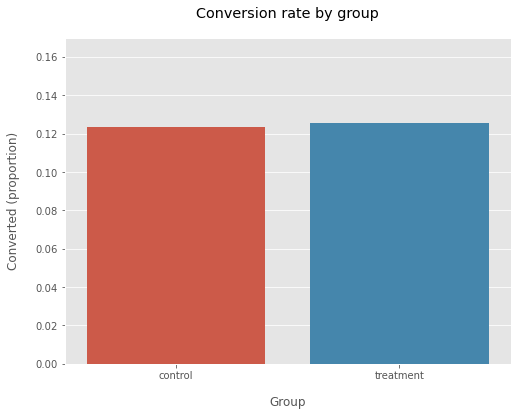

In [79]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

So… the treatment group's value is higher. Is this difference statistically significant?

In [80]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.34
p-value: 0.732
ci 95% for control group: [0.114, 0.133]
ci 95% for treatment group: [0.116, 0.135]


Since p-value $ =0.732$ is way above our $\alpha=0.05$ threshold, we cannot reject the Null hypothesis $H_0$, which means that our new design did not perform significantly different than our old one :( <br>
Moreover, if we look at the confidence interval for the treatment group ($[0.116, 0.135]$, or $11.6-13.5\%$) we notice that: <br>
* It includes our baseline value of $13\%$ conversion rate. 
* It does not include our target value of $15\%$ (the $2\%$ uplift we were aiming for). 